<a href="https://colab.research.google.com/github/die666666/Heart_Disease_Prediction_using_ML/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [152]:
import pandas as pd

In [153]:
data = pd.read_csv('heart.csv')

In [154]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [155]:
data_dupli = data.duplicated().any()

In [156]:
data_dupli

True

In [157]:
data = data.drop_duplicates()

In [158]:
data_dupli = data.duplicated().any()

In [159]:
data_dupli

False

Data Processing

In [160]:
cate_val=[]
cont_val=[]

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)


In [161]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [162]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Cate_value Encoding

In [163]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [164]:
data['cp'].unique()

array([0, 1, 2, 3])

In [165]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


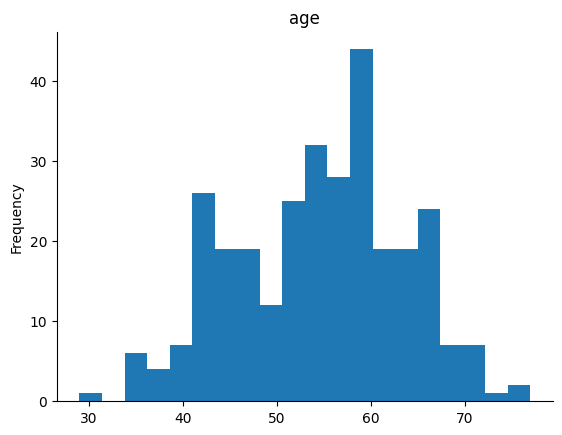

In [166]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

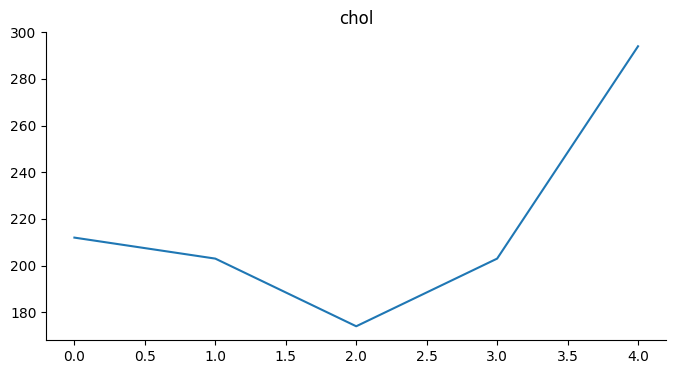

In [167]:
from matplotlib import pyplot as plt
_df_15['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

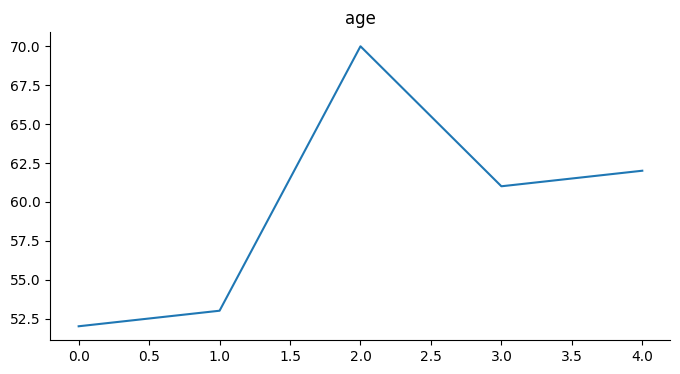

In [168]:
from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

Feature Scaling

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [171]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


Training Set and Testing Set

In [172]:
X = data.drop('target', axis=1)

In [173]:
y = data['target']

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

Logistic Regression

In [176]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [179]:
y_pred1 = log.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

SVC

In [182]:
from sklearn import svm

In [183]:
svm = svm.SVC()

In [184]:
svm.fit(X_train, y_train)

SVC()

In [185]:
y_pred2 = svm.predict(X_test)

In [186]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

KNeigbors Classifer

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn = KNeighborsClassifier()

In [189]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [190]:
y_pred3 = knn.predict(X_test)

In [191]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [192]:
score = []

for k in range(1, 40) :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

In [193]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [194]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

Non-Linear ML Algorithms

In [195]:
data = pd.read_csv('heart.csv')

In [196]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [197]:
data = data.drop_duplicates()

In [198]:
data.shape

(302, 14)

In [199]:
X = data.drop('target', axis=1)
y = data['target']

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Decision Tree Classifier

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt = DecisionTreeClassifier()

In [203]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [204]:
y_pred4 = dt.predict(X_test)

In [205]:
accuracy_score(y_test,y_pred4)

0.6885245901639344

Random Forest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf = RandomForestClassifier()

In [208]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [209]:
y_pred5 = rf.predict(X_test)

In [210]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

Gradient Boosting Classifier

In [211]:
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
gbc = GradientBoostingClassifier()

In [213]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [214]:
y_pred6 = gbc.predict(X_test)

In [215]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [216]:
graph_visuals = pd.DataFrame({'Models' : ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'], 'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [217]:
graph_visuals

,Models,ACC
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.737705
3,DT,0.688525
4,RF,0.836066
5,GB,0.803279


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

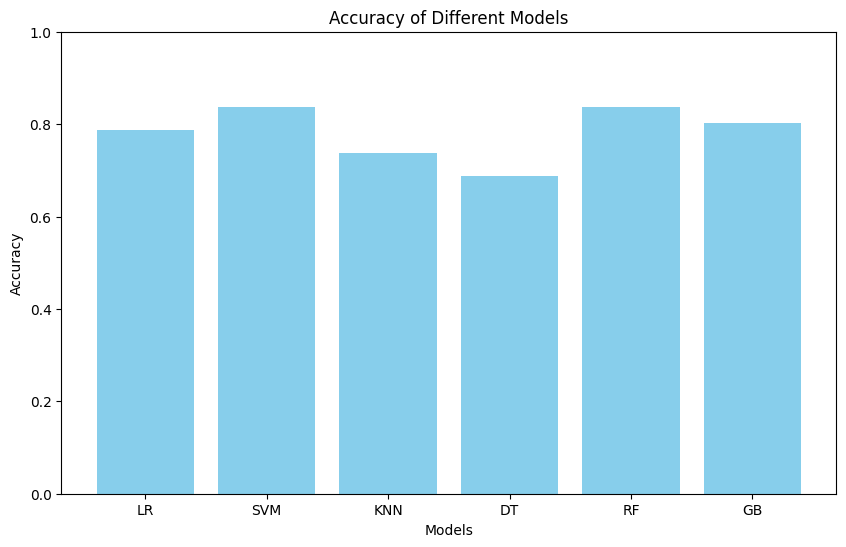

In [221]:
plt.figure(figsize=(10, 6))
plt.bar(graph_visuals['Models'], graph_visuals['ACC'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 as accuracy score is between 0 and 1
plt.show()


In [222]:
X = data.drop('target', axis=1)
y = data['target']

In [223]:
X.shape

(302, 13)

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

New Data

In [265]:
import pandas as pd

new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1],
    'slope': [2],
    'ca': [2],
    'thal': [3]
}, index=[0])


In [266]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3


In [268]:
p = rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Disease")

No Disease


Save Model

In [269]:
import joblib

In [270]:
joblib.dump(rf,'model_heart_disease_prediction')

['model_heart_disease_prediction']

In [272]:
model = joblib.load('model_heart_disease_prediction')

In [273]:
model.predict(new_data)

array([0])